# Descripción del conjunto de datos

El conjunto de datos se descargó del Repositorio: *UC Irvine's Machine Learning*, el enlace al sitio web es:
https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29 


## Información del conjunto de datos

El conjunto de datos se recopiló del *Hospital Universitario de Caracas* en Caracas, Venezuela. El conjunto de datos comprende información demográfica, hábitos y registros médicos históricos de 858 pacientes. Varios pacientes decidieron no responder algunas de las preguntas debido a problemas de privacidad (valores faltantes).

**Información del conjunto de datos**

* (bool) Biopsy: TARGET VARIABLE
* (bool) Hinselmann: test result (excluded from prediction model)
* (bool) Schiller: test result (excluded from prediction model)
* (bool) Cytology: test result (included in prediction model)
* (int) Age
* (int) Number of sexual partners
* (int) First sexual intercourse (age)
* (int) Num of pregnancies
* (bool) Smokes
* (bool) Smokes (years)
* (bool) Smokes (packs/year)
* (bool) Hormonal Contraceptives
* (int) Hormonal Contraceptives (years)
* (bool) IUD
* (int) IUD (years)
* (bool) STDs
* (int) STDs (number)
* (bool) STDs:condylomatosis
* (bool) STDs:cervical condylomatosis
* (bool) STDs:vaginal condylomatosis
* (bool) STDs:vulvo-perineal condylomatosis
* (bool) STDs:syphilis
* (bool) STDs:pelvic inflammatory disease
* (bool) STDs:genital herpes
* (bool) STDs:molluscum contagiosum
* (bool) STDs:AIDS
* (bool) STDs:HIV
* (bool) STDs:Hepatitis B
* (bool) STDs:HPV
* (int) STDs: Number of diagnosis
* (int) STDs: Time since first diagnosis
* (int) STDs: Time since last diagnosis
* (bool) Dx:Cancer
* (bool) Dx:CIN
* (bool) Dx:HPV
* (bool) Dx

***

# Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import pandas_profiling
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from scipy import stats as st
#notebook's library
%matplotlib inline

***

# Importando el conjunto de datos 

In [2]:
data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
print("\n************ Vista al conjunto de datos *************")
print("El conjunto de datos contiene %i observaciones & %i columnas. " %data.shape)


************ Vista al conjunto de datos *************
El conjunto de datos contiene 858 observaciones & 36 columnas. 


Revisaremos el conjunto de datos de la siguiente manera:

In [3]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


Mostraremos diferentes descriptores estadísticos del conjunto de datos que acabamos de importar:

In [4]:
pd.set_option('display.max_columns', None)
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.302545,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***

# Visualización del conjunto de datos
## Graficas del conjunto de datos

### Histograma

Básicamente, los histogramas se utilizan para representar datos proporcionados en forma de algunos grupos. Por lo tanto, si desea representar la población según la edad en forma de gráfico, entonces el histograma se adapta bien, ya que le indica cuántos existen en cierto rango de grupo o bin, si habla en contexto de histogramas.

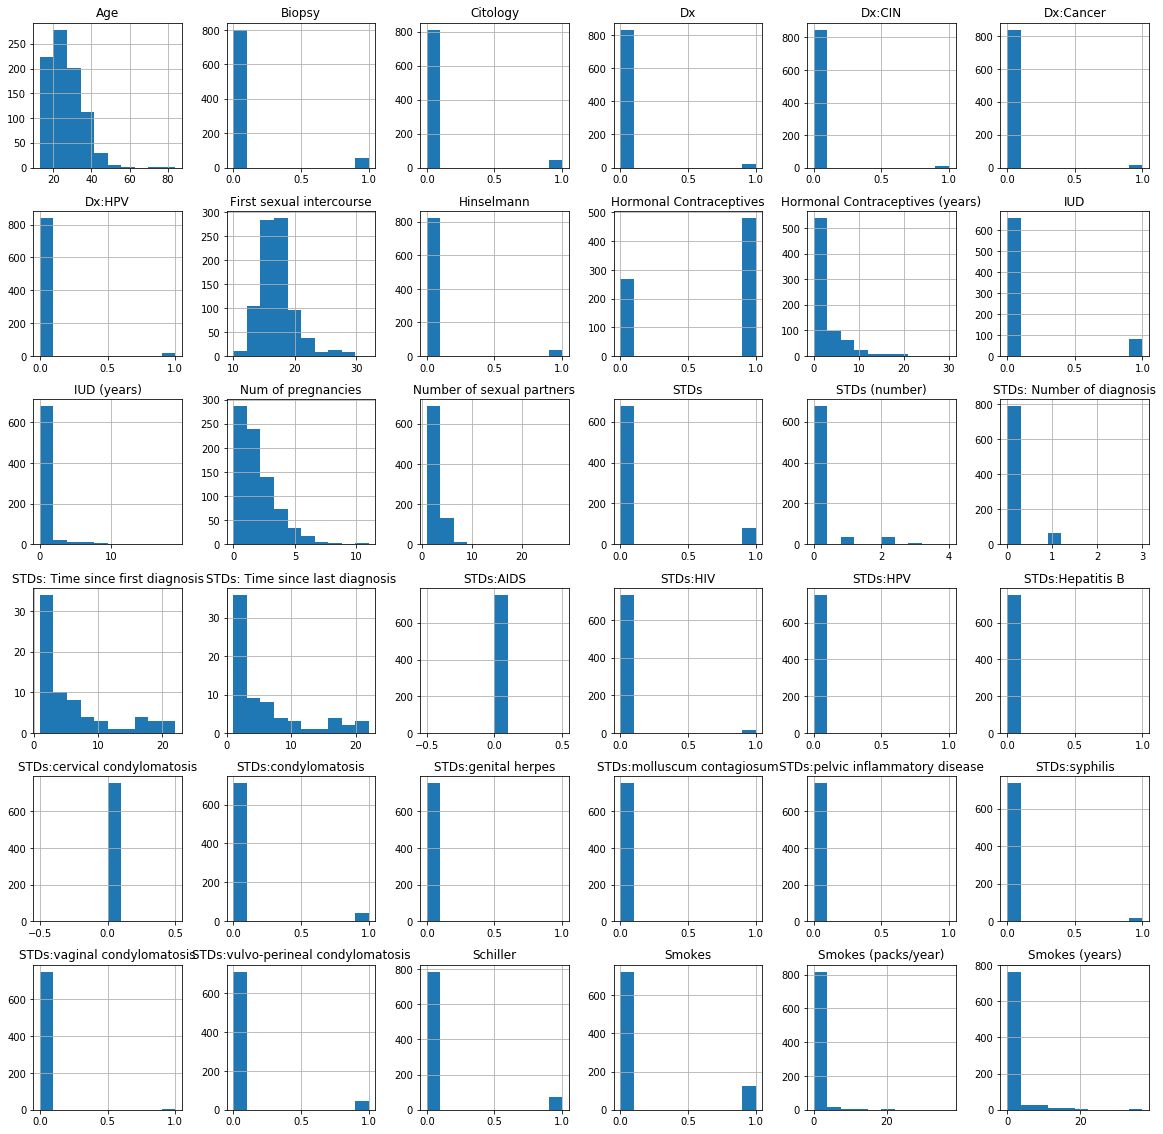

In [5]:
data.hist(figsize=(20,20))
plt.savefig('./output/Histograma.png')

### Variables objetivo

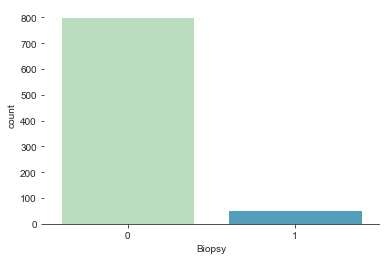

In [6]:
sns.set_style("ticks")
sns.countplot(x='Biopsy', data=data, palette='GnBu');
sns.despine(left=True)
plt.savefig('./output/Biopsy.png')

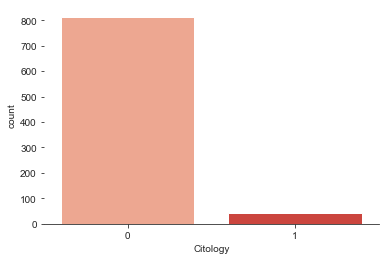

In [7]:
sns.set_style("ticks")
sns.countplot(x='Citology', data=data, palette='Reds');
sns.despine(left=True)
plt.savefig('./output/Citology.png')

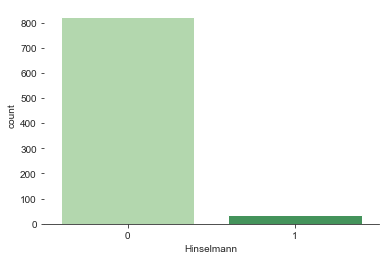

In [8]:
sns.set_style("ticks")
sns.countplot(x='Hinselmann', data=data, palette='Greens');
sns.despine(left=True)
plt.savefig('./output/Hinselmann.png')

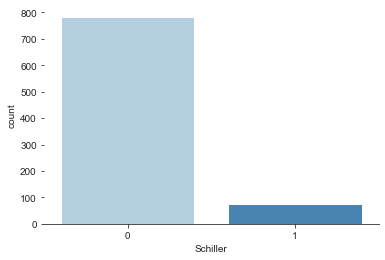

In [9]:
sns.set_style("ticks")
sns.countplot(x='Schiller', data=data, palette='Blues');
sns.despine(left=True)
plt.savefig('./output/Schiller.png')

### Gráfica del área del conjunto de datos

La gráfica del area del conjunto de datos representa la evolución de una variable numérica después de otra variable numérica.

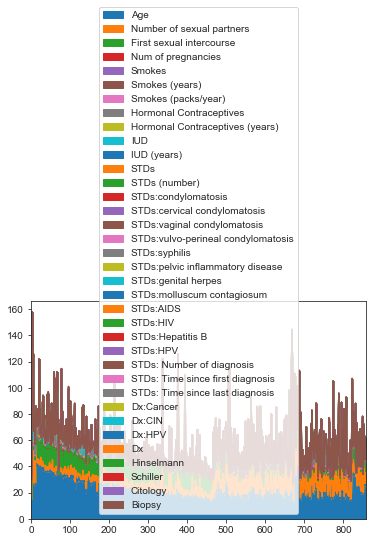

In [10]:
data.plot.area()
plt.savefig('./output/Area.png')

El gráfico del área muestra cada atributo en una curva diferente y luego apila todas las curvas una encima de la otra. Es interesante ver que las dos características dominantes son: Edad y Biopsia. 

Como resultado de lo anterior, se gráfico un histograma, en este se muestra la relación entre Edad y Biopsia, de la cual existe una fuerte correlación.

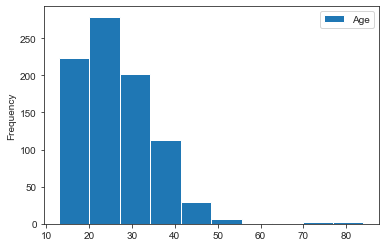

In [11]:
data.plot.hist(x="Biopsy", y="Age")
plt.savefig('./output/Hist_Biopsy_Age.png')

De esto ultimo sabemos que de las mujeres incluidas en el conjunto de datos, la mayoría de los casos de cáncer cervical que resultó en una biopsia ocurrieron cuando las mujeres tenían entre 20
y 30 años.

En conclusión, podemos asegurar con certeza que las biopsias a menudo se realizan en mujeres que todavía quieren tener hijos, ya que la mayoría de las mujeres que aún desean tener hijos tendrían
entre 20 y 30 años.

***

# Preprocesamiento 

Para el preprocesamiento inicial del conjunto de datos, se procederá a hacer lo siguiente:

## Visualización de valores perdidos dentro del conjunto de entrenamiento

Text(0.5, 1, 'Valores perdidos')

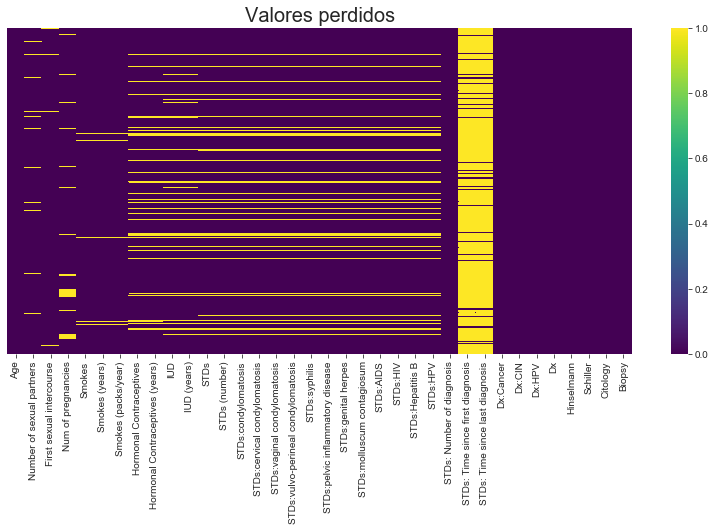

In [12]:
plt.figure(figsize=(14, 6))
p = sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
p.axes.set_title("Valores perdidos", fontsize=20)

Dado que no hay suficientes datos en las características $\textit{STD: Time since first diagnosis}$ y $\textit{STD:
Time since last diagnosis}$, estas características se eliminan del conjunto de datos.

In [13]:
data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)

Verificamos la forma de los datos, despues de haber eliminado estás dos características

In [14]:
data.shape

(858, 34)

Volvemos a verificar mediante el mapa de calor, si las caracteristicas fueron eliminadas correctamente del conjunto de datos. 

Text(0.5, 1, 'Valores perdidos despues de filtrar')

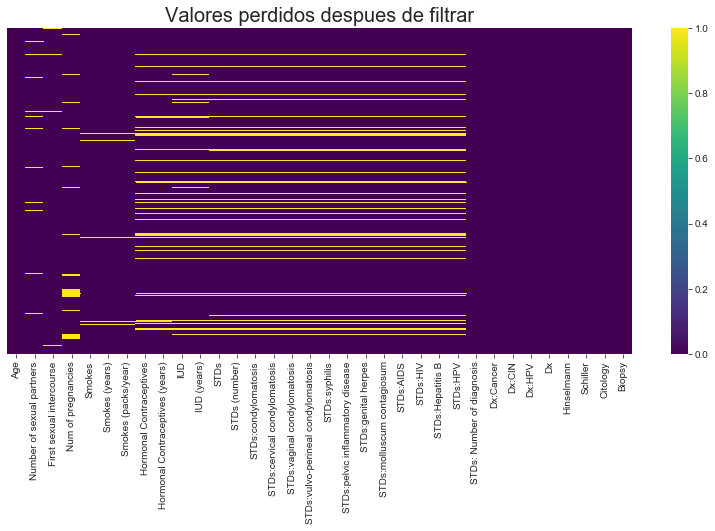

In [15]:
plt.figure(figsize=(14, 6))
p = sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
p.axes.set_title("Valores perdidos despues de filtrar",fontsize=20)

Para los valores faltantes del tipo $\textit{NaN}$, utilizaremos la función $Fillna$ de pandas, utilizando el siguiente método:

In [16]:
# donde pad usa la ultima observación válida
data.fillna(method='pad', inplace=True)

Verificaremos que no tenemos valores pérdidos o nulos en el dataset

In [17]:
data.isnull().values.any()

False

***

# Analisis exploratorio de datos (EDA)

El análisis exploratorio tiene como objetivo identificar el modelo teórico más adecuado para representar la población de la cual proceden los datos muestrales. Dicho análisis se basa en gráficos y estadísticos que permiten explorar la distribución identificando características tales como: valores atípicos o outliers, saltos o discontinuidades, concentraciones de valores, forma de la distribución, etc. 

Por otra parte, este análisis se puede realizar sobre todos los casos conjuntamente o de forma separada por grupos. En este último caso los gráficos y estadísticos permiten identificar si los datos proceden de una o varias poblaciones, considerando la variable que determina los grupos como factor diferenciador de las poblaciones. También permite comprobar, mediante técnicas gráficas y contrastes no paramétricos, si los datos han sido extraídos de una población con distribución aproximadamente normal.

**El objetivo principal es predecir la probabilidad de que una mujer adquiera el cáncer.**

Para ello consideraremos que: 
* Biopsia. 
* Hinselman.
* Schiller
* Citología 

Como las variables objetivo y las otras columnas como las características.

## Profiling

La biblioteca de *Pandas Profiling* crea reportes de perfil a partir de un Pandas Dataframe. Un Dataframe no es más que una estructura de datos en formato de fila-columna, parecido a una matriz, con la diferencia de que en un Dataframe se puede almacenar cualquier tipo de dato.

In [18]:
pandas_profiling.ProfileReport(data)

C:\Users\sebas\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,34
Number of observations,858
Total Missing (%),0.0%
Total size in memory,228.0 KiB
Average record size in memory,272.1 B
Numeric,9
Categorical,0
Boolean,20
Date,0
Text (Unique),0
Rejected,5


***

## Correlación de las características

In [19]:
data.corr()["Biopsy"].sort_values(ascending=False)

Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.130523
Dx:CIN                                0.113172
STDs:HIV                              0.112519
STDs: Number of diagnosis             0.097449
STDs                                  0.096758
STDs (number)                         0.085246
Hormonal Contraceptives (years)       0.084253
STDs:vulvo-perineal condylomatosis    0.077082
STDs:condylomatosis                   0.075080
Smokes (years)                        0.059949
Age                                   0.055956
IUD                                   0.045314
Smokes                                0.039296
Num of pregnancies                    0.036625
Smokes (packs

In [20]:
def display_corr_with_col(df,col):
    corr_matrix = df.corr()
    corr_type = corr_matrix[col].copy()
    abs_corr_type = corr_type.apply(lambda x:abs(x))
    desc_corr_values = abs_corr_type.sort_values(ascending=False)
    y_values = list(desc_corr_values.values)[1:]
    x_values = range(0,len(y_values))
    xlabels = list(desc_corr_values.keys())[1:]
    fig,ax = plt.subplots(figsize=(8,8))
    ax.bar(x_values,y_values)
    ax.set_title('Correlación de todas las características con {}'.format(col),fontsize=20)
    ax.set_ylabel('Pearson correlatie coefficient [abs waarde]', fontsize=16)
    plt.xticks(x_values,xlabels,rotation='vertical')
    plt.show()

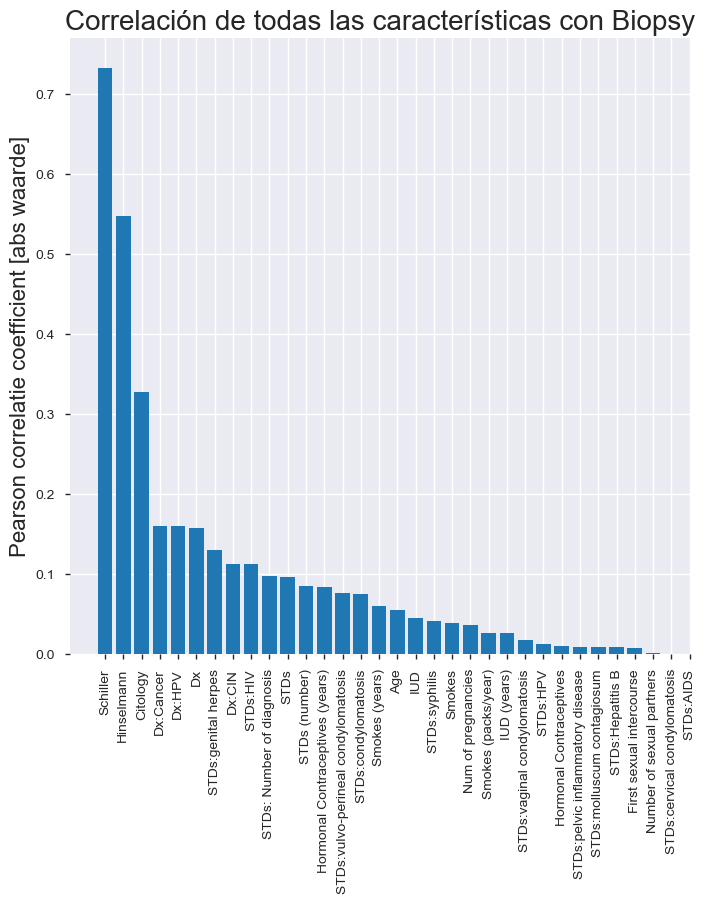

<Figure size 800x550 with 0 Axes>

In [21]:
display_corr_with_col(data,'Biopsy')
plt.savefig('./output/Corr_Biopsy.png')

De lo anterior podemos rescatar lo siguiente:

Las características de *Schiller, Hinselmann, Citología y STD´s* pueden ser las principales caracteristicas para los predictores de este conjunto de datos debido a su alta correlación con la variable objetivo **Biopsia**.

Mientras tanto, las características con correlación de NaN con Biopsia son las columnas con un solo valor distinto, como se muestra a continuación.

### Lista de columnas con solo 1 valor distinto

In [22]:
print([col for col in data.columns if data[col].value_counts().shape[0] == 1])

['STDs:cervical condylomatosis', 'STDs:AIDS']


***

## Selección de atributos

Separaremos las $\textit{features}$ de la clase. En el conjunto de datos la Biopsia representa si se le hizo biopsia o no a la paciente. 

In [23]:
X = data.drop('Biopsy', axis = 1)
y = data['Biopsy']
print(X.shape)
print(y.shape)

(858, 33)
(858,)


Aplicando la técnica de árboles de clasificación obtendremos la puntuación de las características de mayor peso, como se muestra a continuación:

Ranking de atributos:
1. Atributo 31 Schiller (0.344210)
2. Atributo 30 Hinselmann (0.130459)
3. Atributo 0 Age (0.074435)
4. Atributo 2 First sexual intercourse (0.067912)
5. Atributo 8 Hormonal Contraceptives (years) (0.055449)
6. Atributo 1 Number of sexual partners (0.054187)
7. Atributo 32 Citology (0.052432)
8. Atributo 3 Num of pregnancies (0.050461)
9. Atributo 7 Hormonal Contraceptives (0.017214)
10. Atributo 5 Smokes (years) (0.016869)
11. Atributo 10 IUD (years) (0.015934)
12. Atributo 6 Smokes (packs/year) (0.015729)
13. Atributo 19 STDs:genital herpes (0.014970)
14. Atributo 9 IUD (0.010346)
15. Atributo 29 Dx (0.009471)
16. Atributo 27 Dx:CIN (0.009281)
17. Atributo 4 Smokes (0.009139)
18. Atributo 26 Dx:Cancer (0.008390)
19. Atributo 28 Dx:HPV (0.008339)
20. Atributo 12 STDs (number) (0.006339)
21. Atributo 25 STDs: Number of diagnosis (0.006252)
22. Atributo 22 STDs:HIV (0.005842)
23. Atributo 11 STDs (0.005077)
24. Atributo 17 STDs:syphilis (0.004924)
25. Atributo 13 S

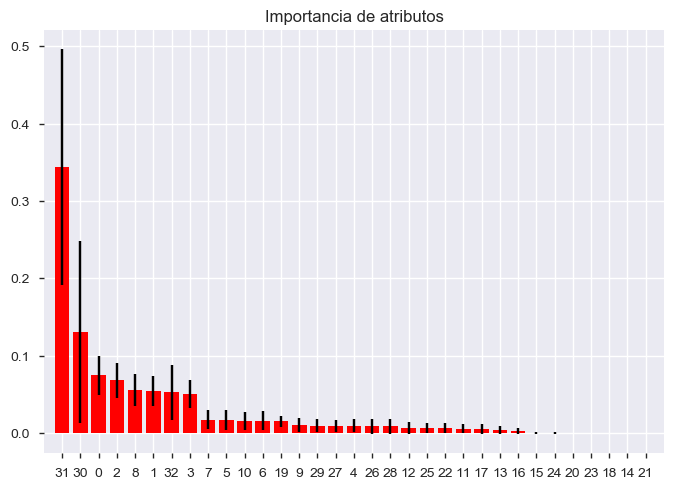

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

# Construir un bosque y calcular las características importantes
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Mostramos el ranking de las características
print("Ranking de atributos:")

for f in range(X.shape[1]):
    print("%d. Atributo %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))
# Mostramos la importancia de las características dentro del bosque creado
plt.figure()
plt.title("Importancia de atributos")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Ahora graficaremos el número de atributos contra el desempeño del clasificador, con esta función obtendremos el número óptimo características:

Número óptimo de atributos: 1


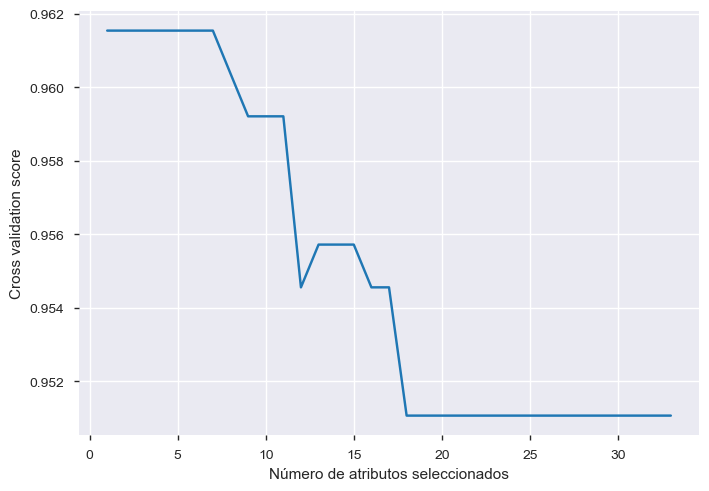

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Calculamos la validación cruzada
svc = SVC(kernel="linear")
# La puntuación de "precisión" es proporcional al número de clasificaciones correctas
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X,y)

print("Número óptimo de atributos: %d" % rfecv.n_features_)

# Trazar el número de características VS. puntajes de validación cruzada
plt.figure()
plt.xlabel("Número de atributos seleccionados")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Matriz de dispersión

Una matriz de dispersión es una matriz asociada a $n$ matrices numéricas tambien llamadas $\textit{variables de datos}$, $x_{1}, x_{2}, \ldots, x_{n}$ de la misma longitud. La celda $(i, j)$ de dicha matriz muestra la gráfica de dispersión de la variable $x_{i}$ frente a $x_{j}$.

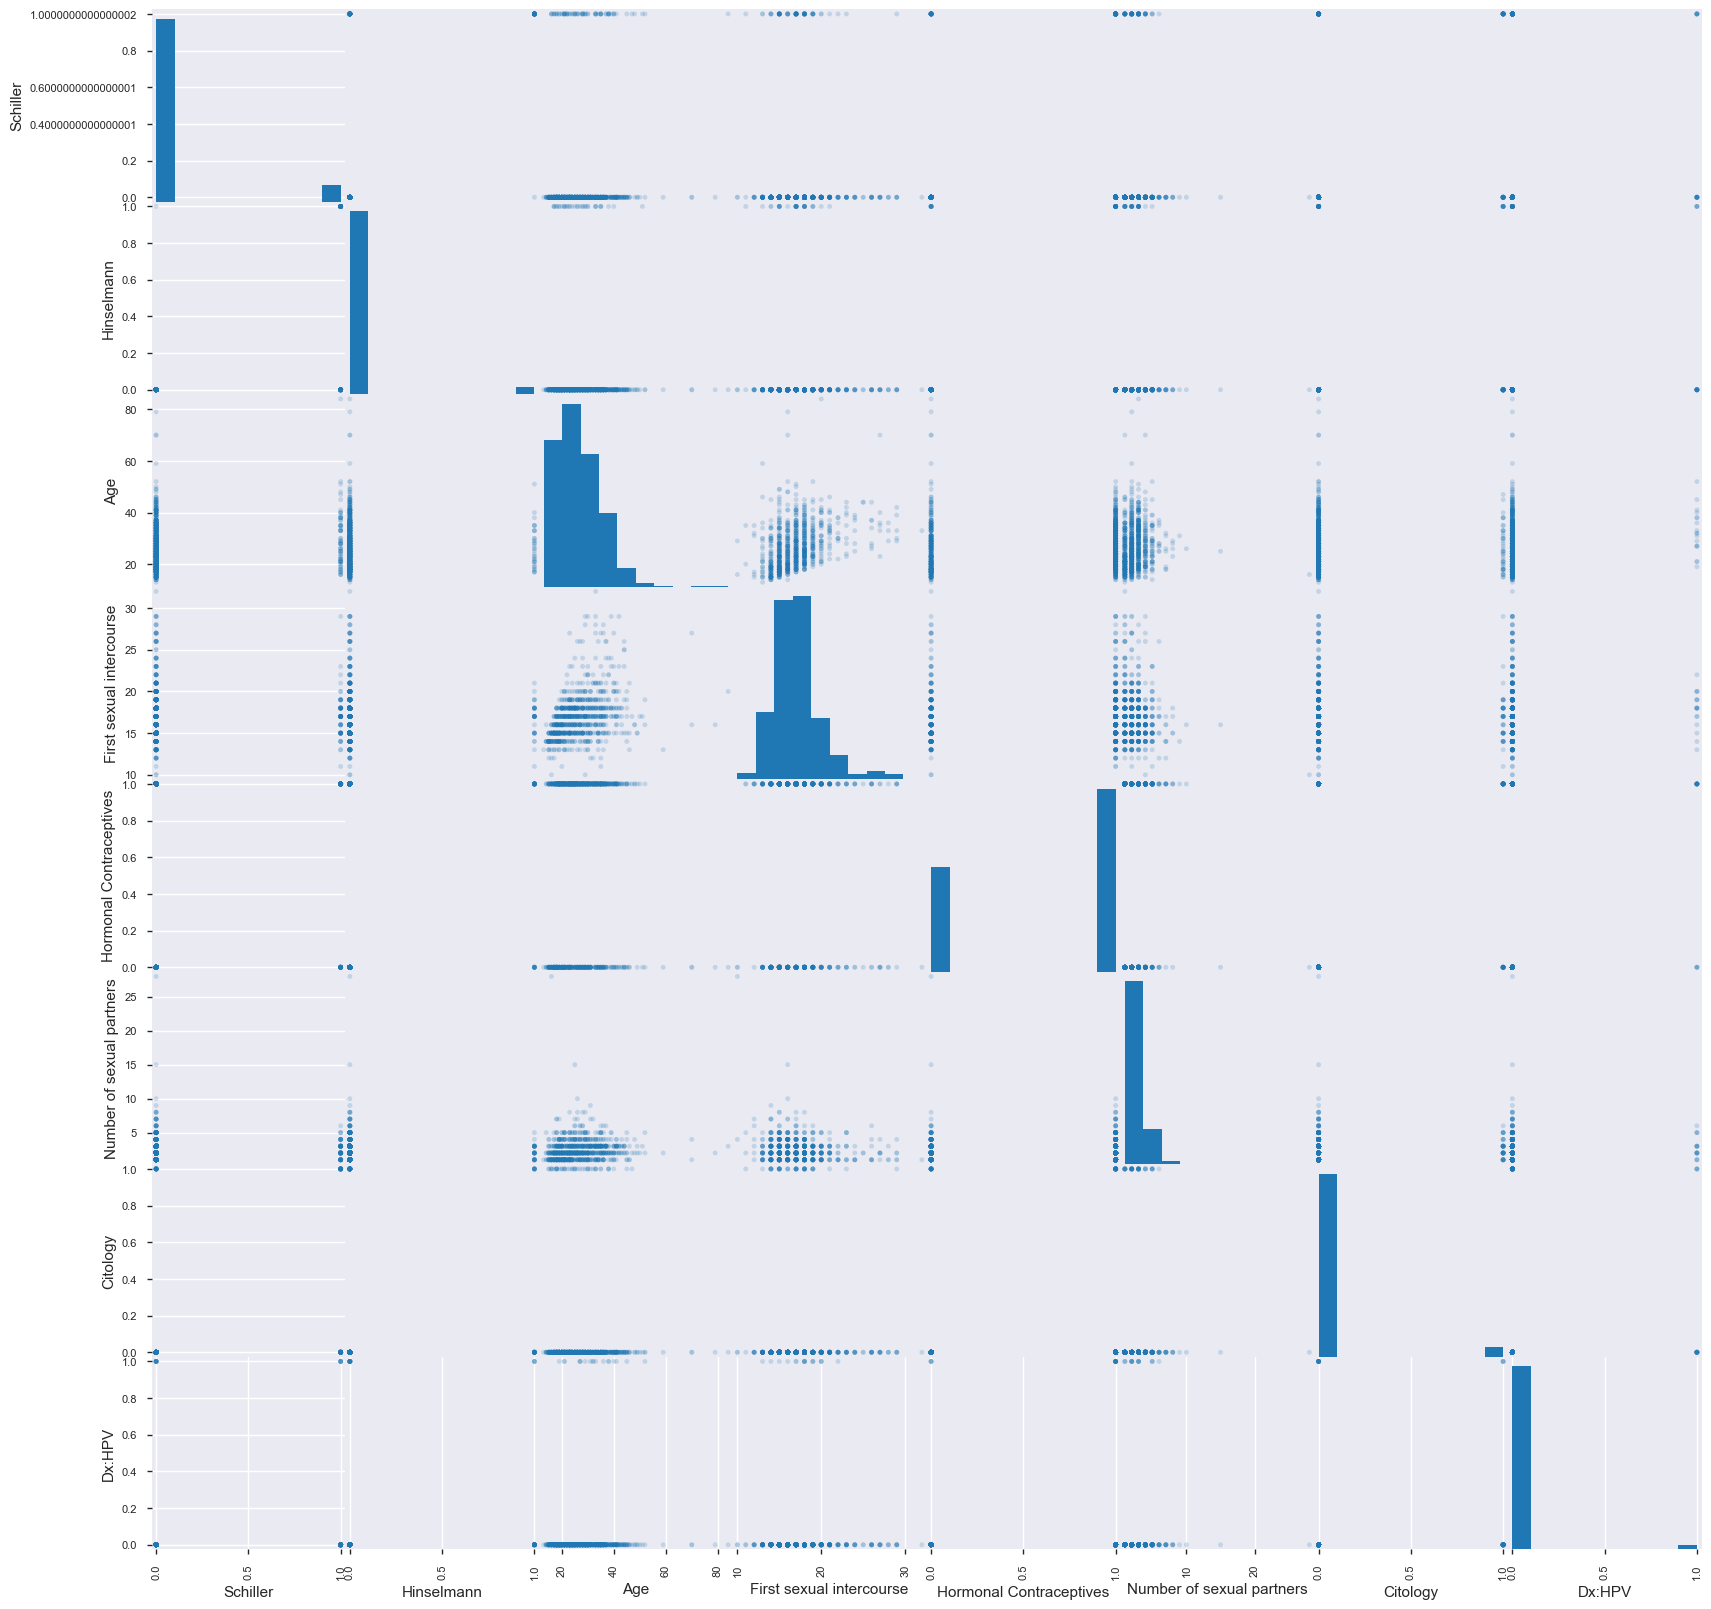

In [26]:
from pandas.plotting import scatter_matrix

df = data[['Schiller','Hinselmann','Age','First sexual intercourse','Hormonal Contraceptives','Number of sexual partners','Citology','Dx:HPV']]
scatter_matrix(df, alpha=0.2, figsize=(20, 20))
plt.savefig('./output/Mat_Dispersion.png')

Procederemos a eliminar las variables menos importantes del conjunto de entrenamiento

In [27]:
data.drop(['STDs:cervical condylomatosis', 'STDs:molluscum contagiosum', 
                     'STDs:pelvic inflammatory disease', 'STDs:vaginal condylomatosis', 
                     'STDs:genital herpes', 'STDs:Hepatitis B', 'STDs:AIDS', 'STDs:HPV'], 
                    axis=1, inplace=True)

Para la implementación de los diferentes clasificadores, usaremos un clasificador de aprendizaje no supervisado, por lo que necesitaremos el conjunto de datos

In [28]:
from sklearn.model_selection import train_test_split
# Dividiremos los conjuntos al 30% 
train, test = train_test_split(data,test_size=0.3, random_state=5)
print (train.shape)
print (test.shape)

(600, 26)
(258, 26)


***

### Visualización Univariante

Para las columnas booleanas, el informe de perfil anterior es bastante informativo. Excepto los "anticonceptivos hormonales", las características booleanas están todas desequilibradas.

In [29]:
quant_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies','Hormonal Contraceptives (years)','IUD (years)']

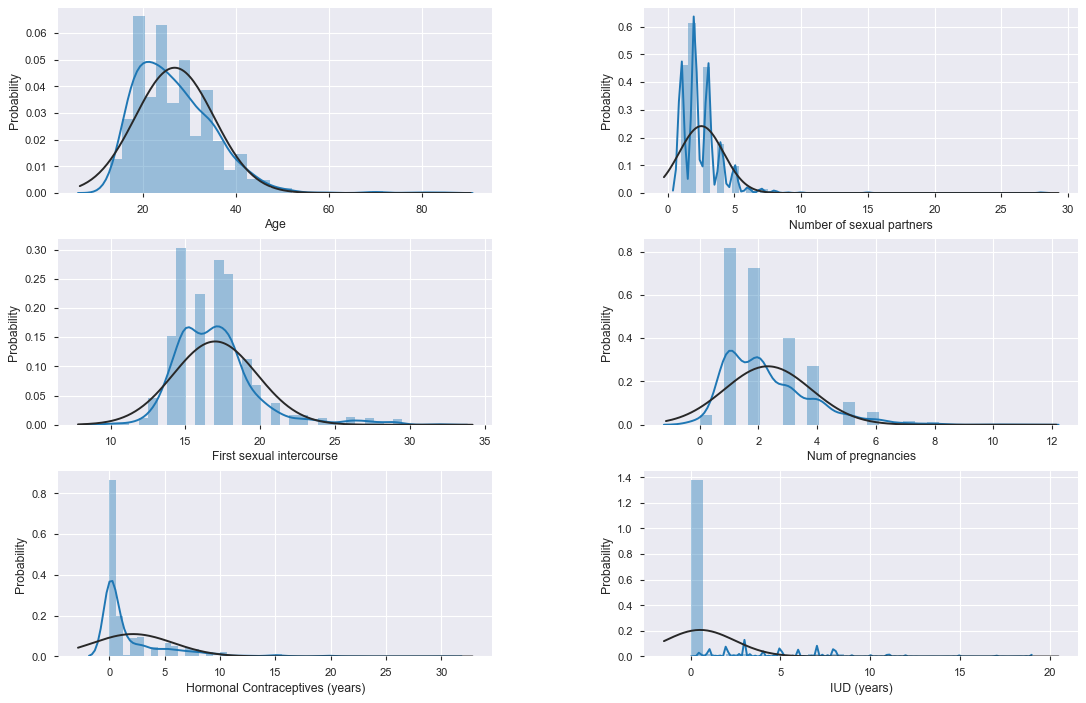

In [30]:
i = 1
plt.figure(i,figsize=(15, 20), dpi=80)
for col in quant_cols:
    plt.subplot(6,2,i)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
    sns.distplot(data[col],fit=norm)
    plt.ylabel('Probability')
    i+=1
plt.savefig('./output/Vis_Univariable.png')

### Normalización del conjunto de datos

In [31]:
data.reset_index()
norm = preprocessing.normalize(data)
data_norm = pd.DataFrame(norm)
data_norm.columns = data.columns

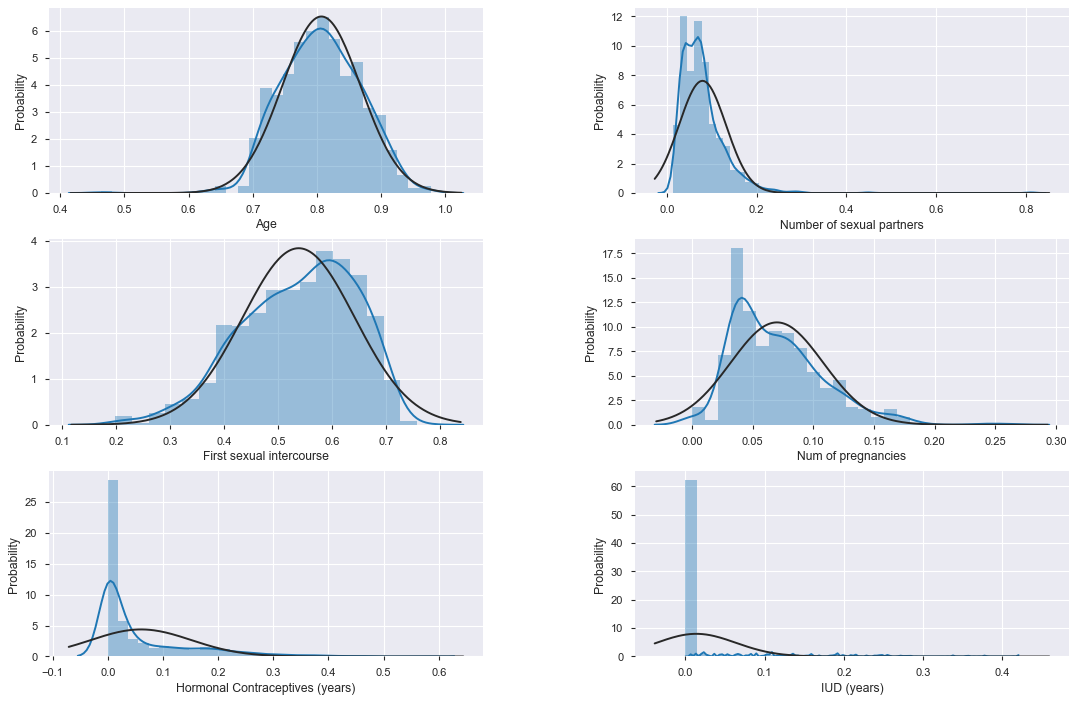

In [32]:
from scipy.stats import norm
i = 1
plt.figure(i,figsize=(15, 20), dpi=80)
for col in quant_cols:
    plt.subplot(6,2,i)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
    sns.distplot(data_norm[col],fit=norm)
    plt.ylabel('Probability')
    i+=1
plt.savefig('./output/Norm_Datos.png')

In [33]:
data_1 = data.copy()
data_1.index = data_norm.index

In [34]:
data_1[quant_cols] = data_norm[quant_cols]

***

# Definición de los conjuntos de entrenamiento y prueba

In [35]:
# Importamos las librerias necesarias
from sklearn.model_selection import train_test_split

In [36]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 26 columns):
Age                                   858 non-null float64
Number of sexual partners             858 non-null float64
First sexual intercourse              858 non-null float64
Num of pregnancies                    858 non-null float64
Smokes                                858 non-null float64
Smokes (years)                        858 non-null float64
Smokes (packs/year)                   858 non-null float64
Hormonal Contraceptives               858 non-null float64
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null float64
IUD (years)                           858 non-null float64
STDs                                  858 non-null float64
STDs (number)                         858 non-null float64
STDs:condylomatosis                   858 non-null float64
STDs:vulvo-perineal condylomatosis    858 non-null float64
STDs:syphi

In [37]:
X = data_1[['Schiller','Hinselmann','Age','First sexual intercourse',
          'Hormonal Contraceptives','Number of sexual partners',
          'Citology','Dx:HPV']]
y = data_1['Biopsy']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)

## Vector de Entrenamiento

In [39]:
print('Forma del vector de entrenamiento (X):')
print(X_train.shape)
print('Forma del vector de entrenamiento (y)')
print(y_train.shape)

Forma del vector de entrenamiento (X):
(600, 8)
Forma del vector de entrenamiento (y)
(600,)


## Vector de Prueba

In [40]:
print('Forma del vector de prueba (X):')
print(X_test.shape)
print('Forma del vector de prueba (y)')
print(y_test.shape)

Forma del vector de prueba (X):
(258, 8)
Forma del vector de prueba (y)
(258,)


***

# Implementación de los modelos de clasificación 
## Clasificación supervisada

### Regresión logística

In [41]:
from sklearn.linear_model import LogisticRegression
# Creamos el modelo de la regresión logística
model_LR = LogisticRegression(solver="sag",
                           multi_class="auto",
                           class_weight="balanced",
                           max_iter=5000)
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

#### Identificar la importancia de las características en función del modelo de regresión logística

Verificaremos los coeficientes del modelo que estamos entrenando.

In [42]:
coef = pd.DataFrame(X_train.columns, columns=["Features"])
coef["Coef"] = model_LR.coef_.reshape(-1,1)
coef["| Coef |"] = np.abs(coef["Coef"])
coef.sort_values(by="| Coef |", ascending=False)

,Features,Coef,| Coef |
0,Schiller,4.845521,4.845521
1,Hinselmann,0.861877,0.861877
6,Citology,0.749005,0.749005
7,Dx:HPV,0.560398,0.560398
3,First sexual intercourse,0.463716,0.463716
2,Age,-0.383035,0.383035
5,Number of sexual partners,-0.236568,0.236568
4,Hormonal Contraceptives,-0.093565,0.093565


#### Validaremos el modelo de la Regresión Logística

In [43]:
# Realizamos la predicción
y_pred_LR = model_LR.predict(X_test)
print(y_pred_LR)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


#### Metricas de Rendimiento

In [44]:
print("Precisón del entrenamiento: {:.3f}".format(model_LR.score(X_train, y_train)))
print("Precisión de las pruebas: {:.3f}".format(model_LR.score(X_test, y_test)))

Precisón del entrenamiento: 0.972
Precisión de las pruebas: 0.938


##### Reporte de clasificación

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       243
           1       0.48      0.73      0.58        15

    accuracy                           0.94       258
   macro avg       0.73      0.84      0.77       258
weighted avg       0.95      0.94      0.94       258



##### Matriz de confusión 

[[231  12]
 [  4  11]]


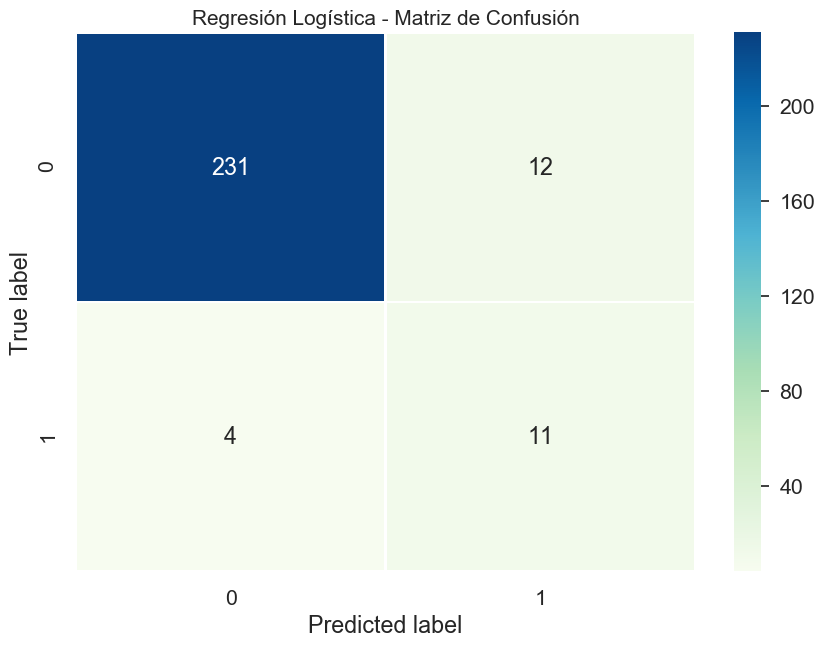

In [46]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, y_pred_LR)
print(cm)
sns.set(font_scale=1.4)
g = sns.heatmap(cm, annot=True, cmap='GnBu', fmt='g', linewidths=1.0)
g.axes.set_title("Regresión Logística - Matriz de Confusión",fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./output/fig-logRegresion-confusion.png')

***

### SVM - Kernel Lineal

Para este apartado, implementaremos el Kernel Lineal para las Máquinas de Soporte Vectorial, por lo que ajustaremos los datos al conjunto de entrenamiento

In [47]:
from sklearn.svm import SVC

# declaramos el modelo lineal de la SVM
model_SVM_Linear = SVC(gamma="auto",
            kernel='linear', # función lineal
            class_weight="balanced")
model_SVM_Linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predeciremos los resultados del conjunto de pruebas utilizando las SVM con Kernel lineal

In [48]:
y_pred_SVM_Linear = model_SVM_Linear.predict(X_test)
print(y_pred_SVM_Linear)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


Calcularemos las precisiones de los conjuntos de entrenamiento y prueba

In [49]:
print("Precisón del entrenamiento: {:.3f}".format(model_SVM_Linear.score(X_train, y_train)))
print("Precisión de las pruebas: {:.3f}".format(model_SVM_Linear.score(X_test, y_test)))

Precisón del entrenamiento: 0.972
Precisión de las pruebas: 0.938


#### Reporte de clasificación 

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVM_Linear))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       243
           1       0.48      0.73      0.58        15

    accuracy                           0.94       258
   macro avg       0.73      0.84      0.77       258
weighted avg       0.95      0.94      0.94       258



#### Matriz de confusión 

[[231  12]
 [  4  11]]


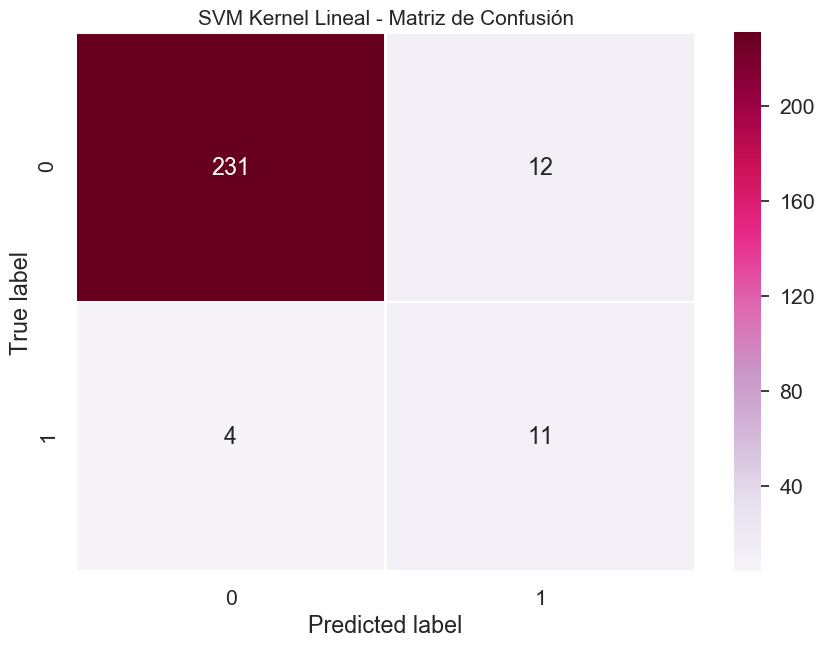

In [51]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, y_pred_SVM_Linear)
print(cm)
sns.set(font_scale=1.4)
g = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g', linewidths=1.0)
g.axes.set_title("SVM Kernel Lineal - Matriz de Confusión",fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./output/fig-SVMLinear-confusion.png')

### SVM - Kernel RBF

In [52]:
from sklearn.svm import SVC
# creamos el modelo de la SVM
model_SVM_RBF = SVC(gamma="auto",
            kernel='rbf', # función de tipo RBF
            class_weight="balanced")
model_SVM_RBF.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
y_pred_SVM_RBF = model_SVM_RBF.predict(X_test)
print(y_pred_SVM_RBF)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [54]:
print("Precisón del entrenamiento: {:.3f}".format(model_SVM_RBF.score(X_train, y_train)))
print("Precisión de las pruebas: {:.3f}".format(model_SVM_RBF.score(X_test, y_test)))

Precisón del entrenamiento: 0.972
Precisión de las pruebas: 0.938


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_SVM_RBF))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       243
           1       0.48      0.73      0.58        15

    accuracy                           0.94       258
   macro avg       0.73      0.84      0.77       258
weighted avg       0.95      0.94      0.94       258



[[231  12]
 [  4  11]]


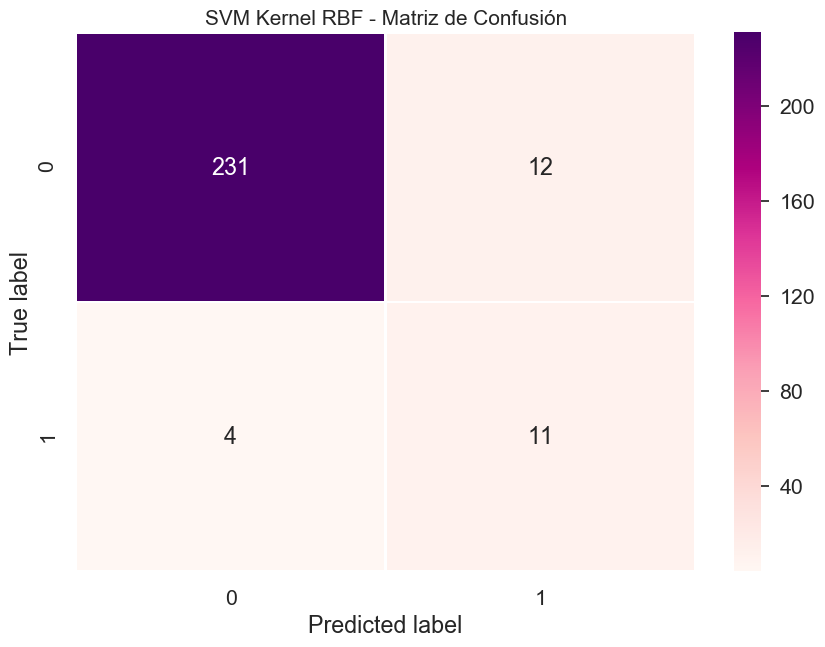

In [56]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, y_pred_SVM_RBF)
print(cm)
sns.set(font_scale=1.4)
g = sns.heatmap(cm, annot=True, cmap='RdPu', fmt='g', linewidths=1.0)
g.axes.set_title("SVM Kernel RBF - Matriz de Confusión",fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./output/fig-SVMrbf-confusion.png')

***

## RNA - Perceptrón multi-capa

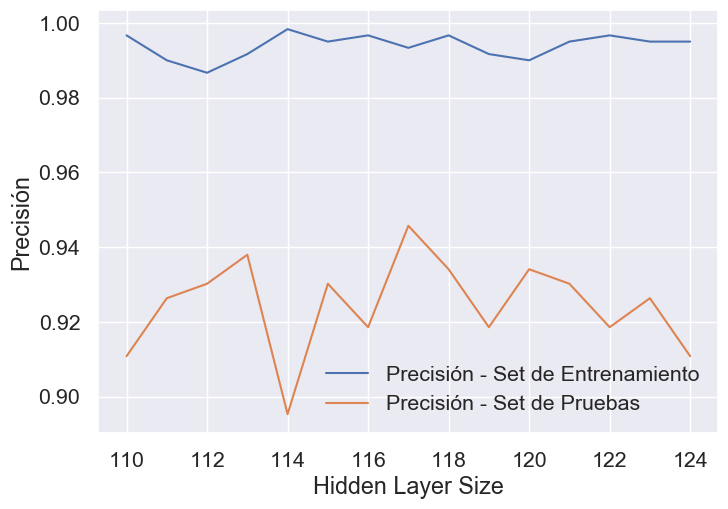

In [57]:
from sklearn.neural_network import MLPClassifier

training_acc = []
test_acc = []

hidden_layer_sizes_range = range(110,125)
for i in hidden_layer_sizes_range:
    clf = MLPClassifier(solver='lbfgs', activation='tanh', hidden_layer_sizes=(i, i),random_state=70)
    clf.fit(X_train, y_train)
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
            
plt.plot(hidden_layer_sizes_range, training_acc, label=u"Precisión - Set de Entrenamiento")
plt.plot(hidden_layer_sizes_range, test_acc, label=u"Precisión - Set de Pruebas")
plt.ylabel(u"Precisión")
plt.xlabel(u"Hidden Layer Size")
plt.legend()
plt.savefig('./output/RNA_Precision_Ent_Prueba.png')

In [58]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', activation='tanh', hidden_layer_sizes=[118, 118], random_state=70)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[118, 118], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=70, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [59]:
print("Precisión - Conjunto de Entrenamiento: {:.3f}".format(mlp.score(X_train, y_train)))
print("Precisión - Conjunto de Pruebas: {:.3f}".format(mlp.score(X_test, y_test)))

Precisión - Conjunto de Entrenamiento: 0.997
Precisión - Conjunto de Pruebas: 0.934


In [60]:
print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       243
           1       0.43      0.40      0.41        15

    accuracy                           0.93       258
   macro avg       0.70      0.68      0.69       258
weighted avg       0.93      0.93      0.93       258



[[235   8]
 [  9   6]]


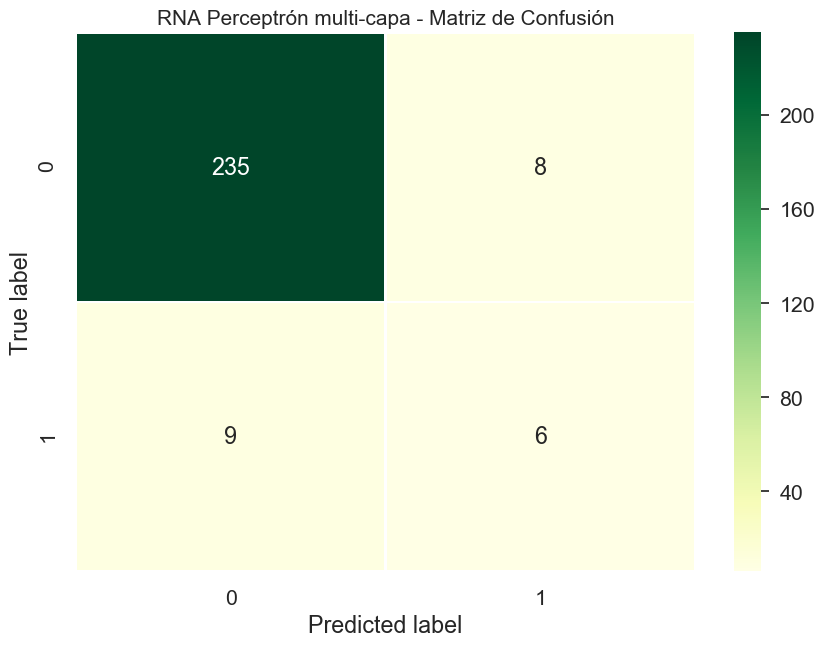

In [61]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, mlp.predict(X_test))
print(cm)
sns.set(font_scale=1.4)
g = sns.heatmap(cm, annot=True, cmap='YlGn', fmt='g', linewidths=1.0)
g.axes.set_title("RNA Perceptrón multi-capa - Matriz de Confusión",fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./output/fig-RNA-confusion.png')

***

## RNA - Keras

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [63]:
model_Keras = Sequential()

#Input layer
model_Keras.add(Dense(units=1000, 
                input_dim=8, 
                kernel_initializer='uniform', 
                activation='relu'))
model_Keras.add(Dropout(0.5))

#Hidden layer 1
model_Keras.add(Dense(units=500,  
                kernel_initializer='uniform', 
                activation='relu'))
model_Keras.add(Dropout(0.5))

#Hidden layer 2
model_Keras.add(Dense(units=500,  
                kernel_initializer='uniform', 
                activation='relu'))
model_Keras.add(Dropout(0.5))

#Output layer
model_Keras.add(Dense(units=1,
                kernel_initializer='uniform', 
                activation='sigmoid'))

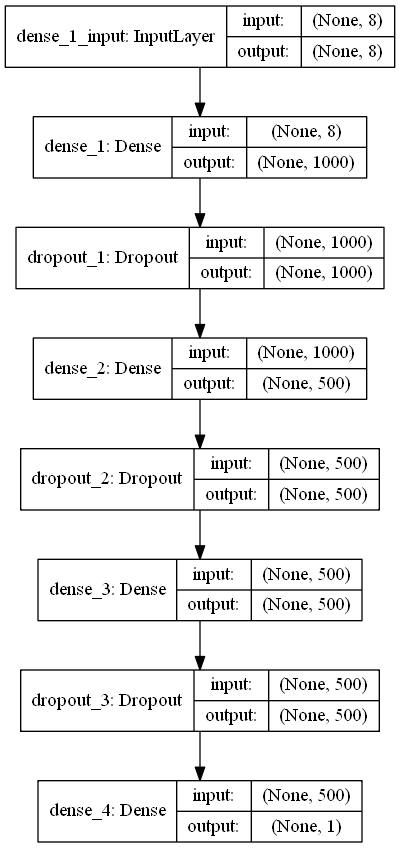

In [64]:
from keras.utils.vis_utils import plot_model

plot_model(model_Keras, to_file='RNA_model.png', show_shapes=True, show_layer_names=True)

In [65]:
model_Keras.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              9000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [66]:
# Aqui definimos como es que se medira el rendimiento del clasificador. 
model_Keras.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# La variable de "verbose", muestra la pérdida y precisión de cambio oportuno en la red neuronal. 
train_history = model_Keras.fit(X_train, y_train, batch_size = 200, epochs = 40, validation_split = 0.2, verbose = 2)

Train on 480 samples, validate on 120 samples
Epoch 1/40
 - 1s - loss: 0.6628 - accuracy: 0.7854 - val_loss: 0.5550 - val_accuracy: 0.9333
Epoch 2/40
 - 0s - loss: 0.4877 - accuracy: 0.9333 - val_loss: 0.2987 - val_accuracy: 0.9333
Epoch 3/40
 - 0s - loss: 0.2726 - accuracy: 0.9333 - val_loss: 0.2347 - val_accuracy: 0.9333
Epoch 4/40
 - 0s - loss: 0.2606 - accuracy: 0.9333 - val_loss: 0.2306 - val_accuracy: 0.9333
Epoch 5/40
 - 0s - loss: 0.2306 - accuracy: 0.9333 - val_loss: 0.1604 - val_accuracy: 0.9333
Epoch 6/40
 - 0s - loss: 0.1578 - accuracy: 0.9333 - val_loss: 0.1131 - val_accuracy: 0.9333
Epoch 7/40
 - 0s - loss: 0.1276 - accuracy: 0.9333 - val_loss: 0.1043 - val_accuracy: 0.9333
Epoch 8/40
 - 0s - loss: 0.1197 - accuracy: 0.9333 - val_loss: 0.0925 - val_accuracy: 0.9333
Epoch 9/40
 - 0s - loss: 0.1067 - accuracy: 0.9479 - val_loss: 0.0753 - val_accuracy: 0.9417
Epoch 10/40
 - 0s - loss: 0.1000 - accuracy: 0.9458 - val_loss: 0.0676 - val_accuracy: 0.9667
Epoch 11/40
 - 0s - los

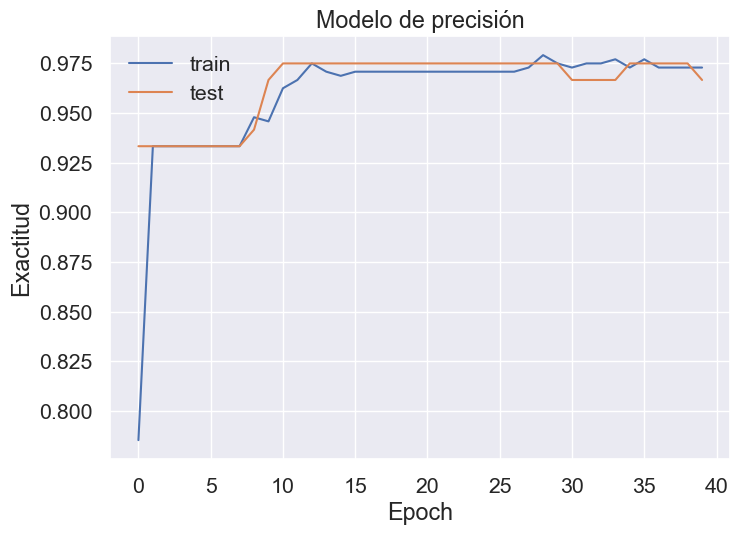

<Figure size 800x550 with 0 Axes>

In [67]:
# summarize history for accuracy
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Modelo de precisión')
plt.ylabel('Exactitud')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
plt.savefig('./output/Keras_Mod_Precision.png')

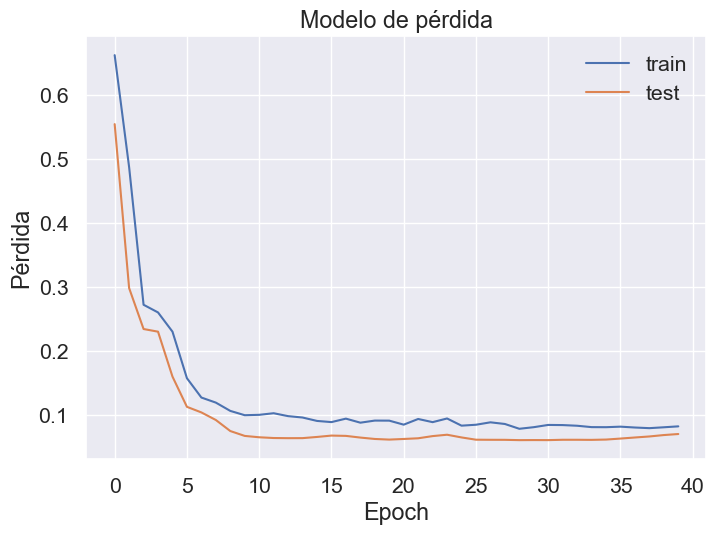

<Figure size 800x550 with 0 Axes>

In [68]:
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Modelo de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
plt.savefig('./output/Keras_Mod_Perdida.png')

***

## K Vecinos más cercanos

Hayaremos las mejores K en el conjunto de entrenamiento. 

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

best_k = 0
best_score = 0

for k in range(3,200,2):
    # Inicializamos el modelo de KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    # Ajustaremos el modelo al conjunto de entrenamiento
    knn.fit(X_train, y_train)
    # Predeciremos en el conjunto de prueba
    knn_pred = knn.predict(X_test)
    # Obtenemos la precisión
    score = metrics.accuracy_score(y_test, knn_pred) * 100
    
    if score >= best_score and k >= best_k:
        best_score = score
        best_k = k

# Imprimimos el mejor resultado y la K óptima
print("---Mejor resultado de ---\nK:", best_k)
print("\nPuntaje:", best_score)

---Mejor resultado de ---
K: 37

Puntaje: 95.34883720930233


In [70]:
# Construimos el modelo utilizando la mejor K
k = best_k

# Instanciamos el modelo 
knn = KNeighborsClassifier(n_neighbors=k)

# Ajustamos el modelo al conjunto de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [71]:
# Predeciremos usando el KNN
knn_pred = knn.predict(X_test)
print(knn_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [72]:
print("Precisón del entrenamiento: {:.3f}".format(knn.score(X_train, y_train)))
print("Precisión de las pruebas: {:.3f}".format(knn.score(X_test, y_test)))

Precisón del entrenamiento: 0.955
Precisión de las pruebas: 0.953


#### Reporte de clasificación 

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       243
           1       0.67      0.40      0.50        15

    accuracy                           0.95       258
   macro avg       0.82      0.69      0.74       258
weighted avg       0.95      0.95      0.95       258



#### Matriz de confusión 

[[240   3]
 [  9   6]]


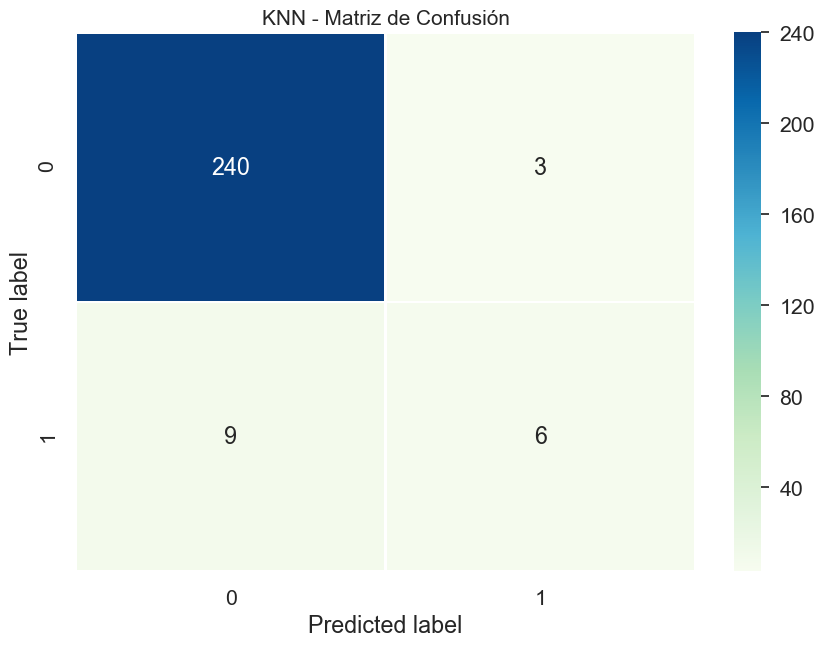

In [74]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, knn_pred)
print(cm)
sns.set(font_scale=1.4)
g = sns.heatmap(cm, annot=True, cmap='GnBu', fmt='g', linewidths=1.0)
g.axes.set_title("KNN - Matriz de Confusión",fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./output/fig-knn-confusion.png')

***

## Clasificación No Supervisada

### Agrupamiento de K-Means

Se utiliza k-Means como primer método de clasificación, definiendo 2 clusters como limite. Como el método de clasificación es un método de aprendizaje no supervisado, no necesitaremos el nombre de la clase dentro del set de datos. 

In [75]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.25, random_state=0)
data_train.shape, data_test.shape

((643, 26), (215, 26))

Ajustaremos el algoritmo de K-Means al conjunto de entrenamiento

In [76]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(data_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Aplicaremos la predicción sobre el conjunto de entrenamiento

In [77]:
k_class_result = kmeans.predict(data_train)
print(k_class_result)

[1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1
 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0
 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 1 0 

#### Probaremos el conjunto de entrenamiento

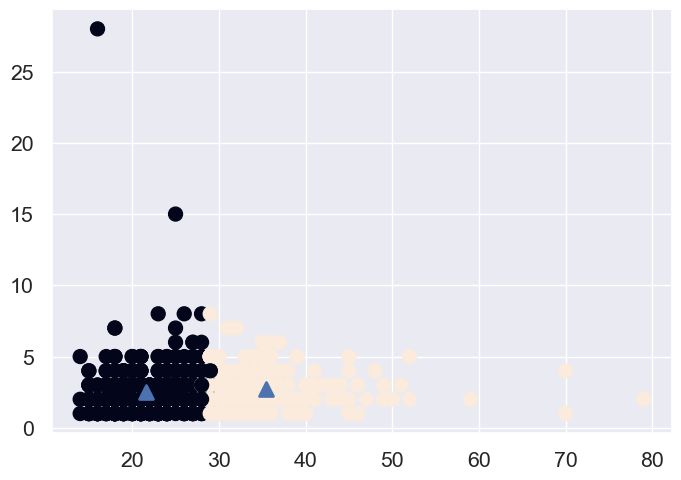

In [78]:
plt.scatter(data_train.values[:, 0], data_train.values[:, 1], c=k_class_result, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', s=100, linewidth=2)
plt.savefig('./output/KMEANS.png')

#### Probaremos el conjunto de pruebas

[0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0
 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0]


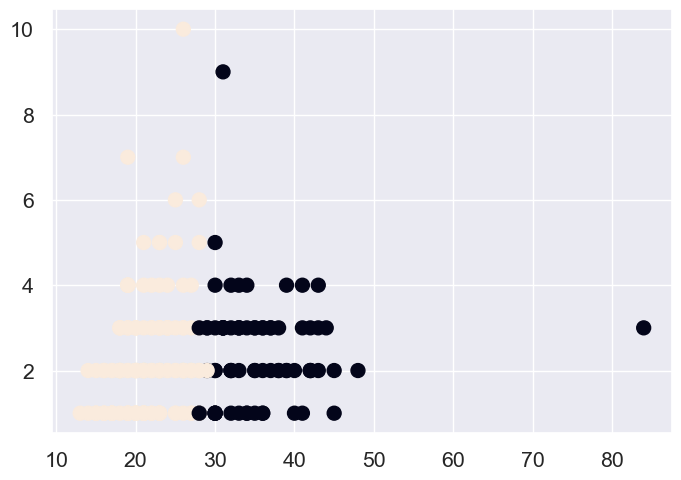

In [79]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_test)
k_class_test_result = kmeans.predict(data_test)
print(k_class_test_result)
plt.scatter(data_test.values[:, 0], data_test.values[:, 1], c=k_class_test_result, s=100)
plt.savefig('./output/Final_KMEANS.png')

***

### Árboles de decisión 

Ajustaremos el algoritmo de los árboles de decisión, seleccionando el criterio de la entropía para tratar las impurezas al conjunto de entrenamiento

In [80]:
from sklearn.tree import DecisionTreeClassifier

# creamos el modelo de los árboles de decisión
model_Tree = DecisionTreeClassifier(class_weight="balanced", criterion = "entropy", random_state = 0)
model_Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Aplicaremos la predicción sobre el conjunto de entrenamiento

In [81]:
y_pred_Tree = model_Tree.predict(X_test)
print(y_pred_Tree)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


#### Calcularemos la precisión de los conjuntos de prueba y de entrenamiento

In [82]:
print("Precisón del entrenamiento: {:.3f}".format(model_Tree.score(X_train, y_train))) 
print("Precisión de las pruebas: {:.3f}".format(model_Tree.score(X_test, y_test)))

Precisón del entrenamiento: 1.000
Precisión de las pruebas: 0.926


##### Reporte de clasificación

In [83]:
print(classification_report(y_test, y_pred_Tree))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       243
           1       0.40      0.53      0.46        15

    accuracy                           0.93       258
   macro avg       0.69      0.74      0.71       258
weighted avg       0.94      0.93      0.93       258



##### Matriz de Confusión

[[231  12]
 [  7   8]]


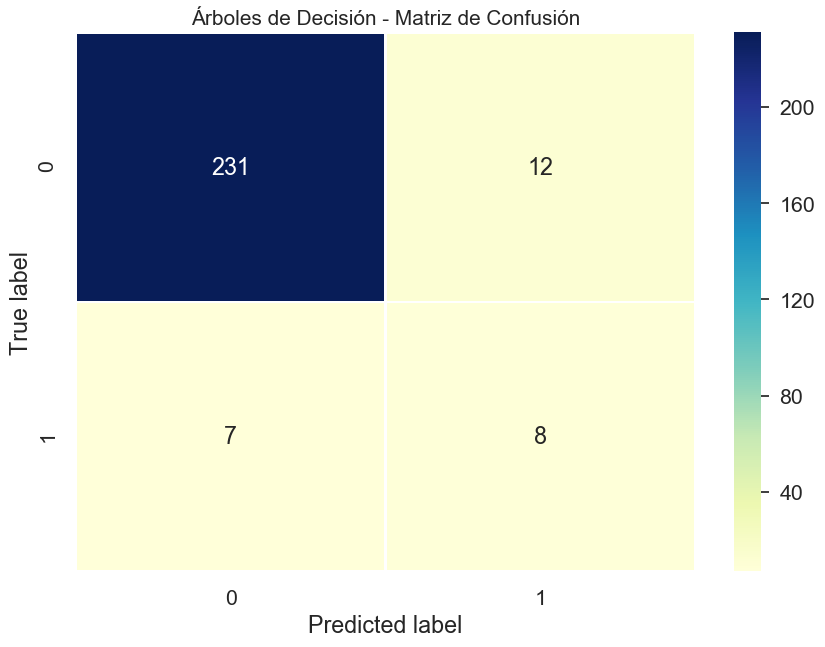

In [84]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, y_pred_Tree)
print(cm)
sns.set(font_scale=1.4)
g = sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g', linewidths=1.0)
g.axes.set_title("Árboles de Decisión - Matriz de Confusión",fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./output/fig-DT_1-confusion.png')

##### Visualización del modelo de árboles de decisión

In [85]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


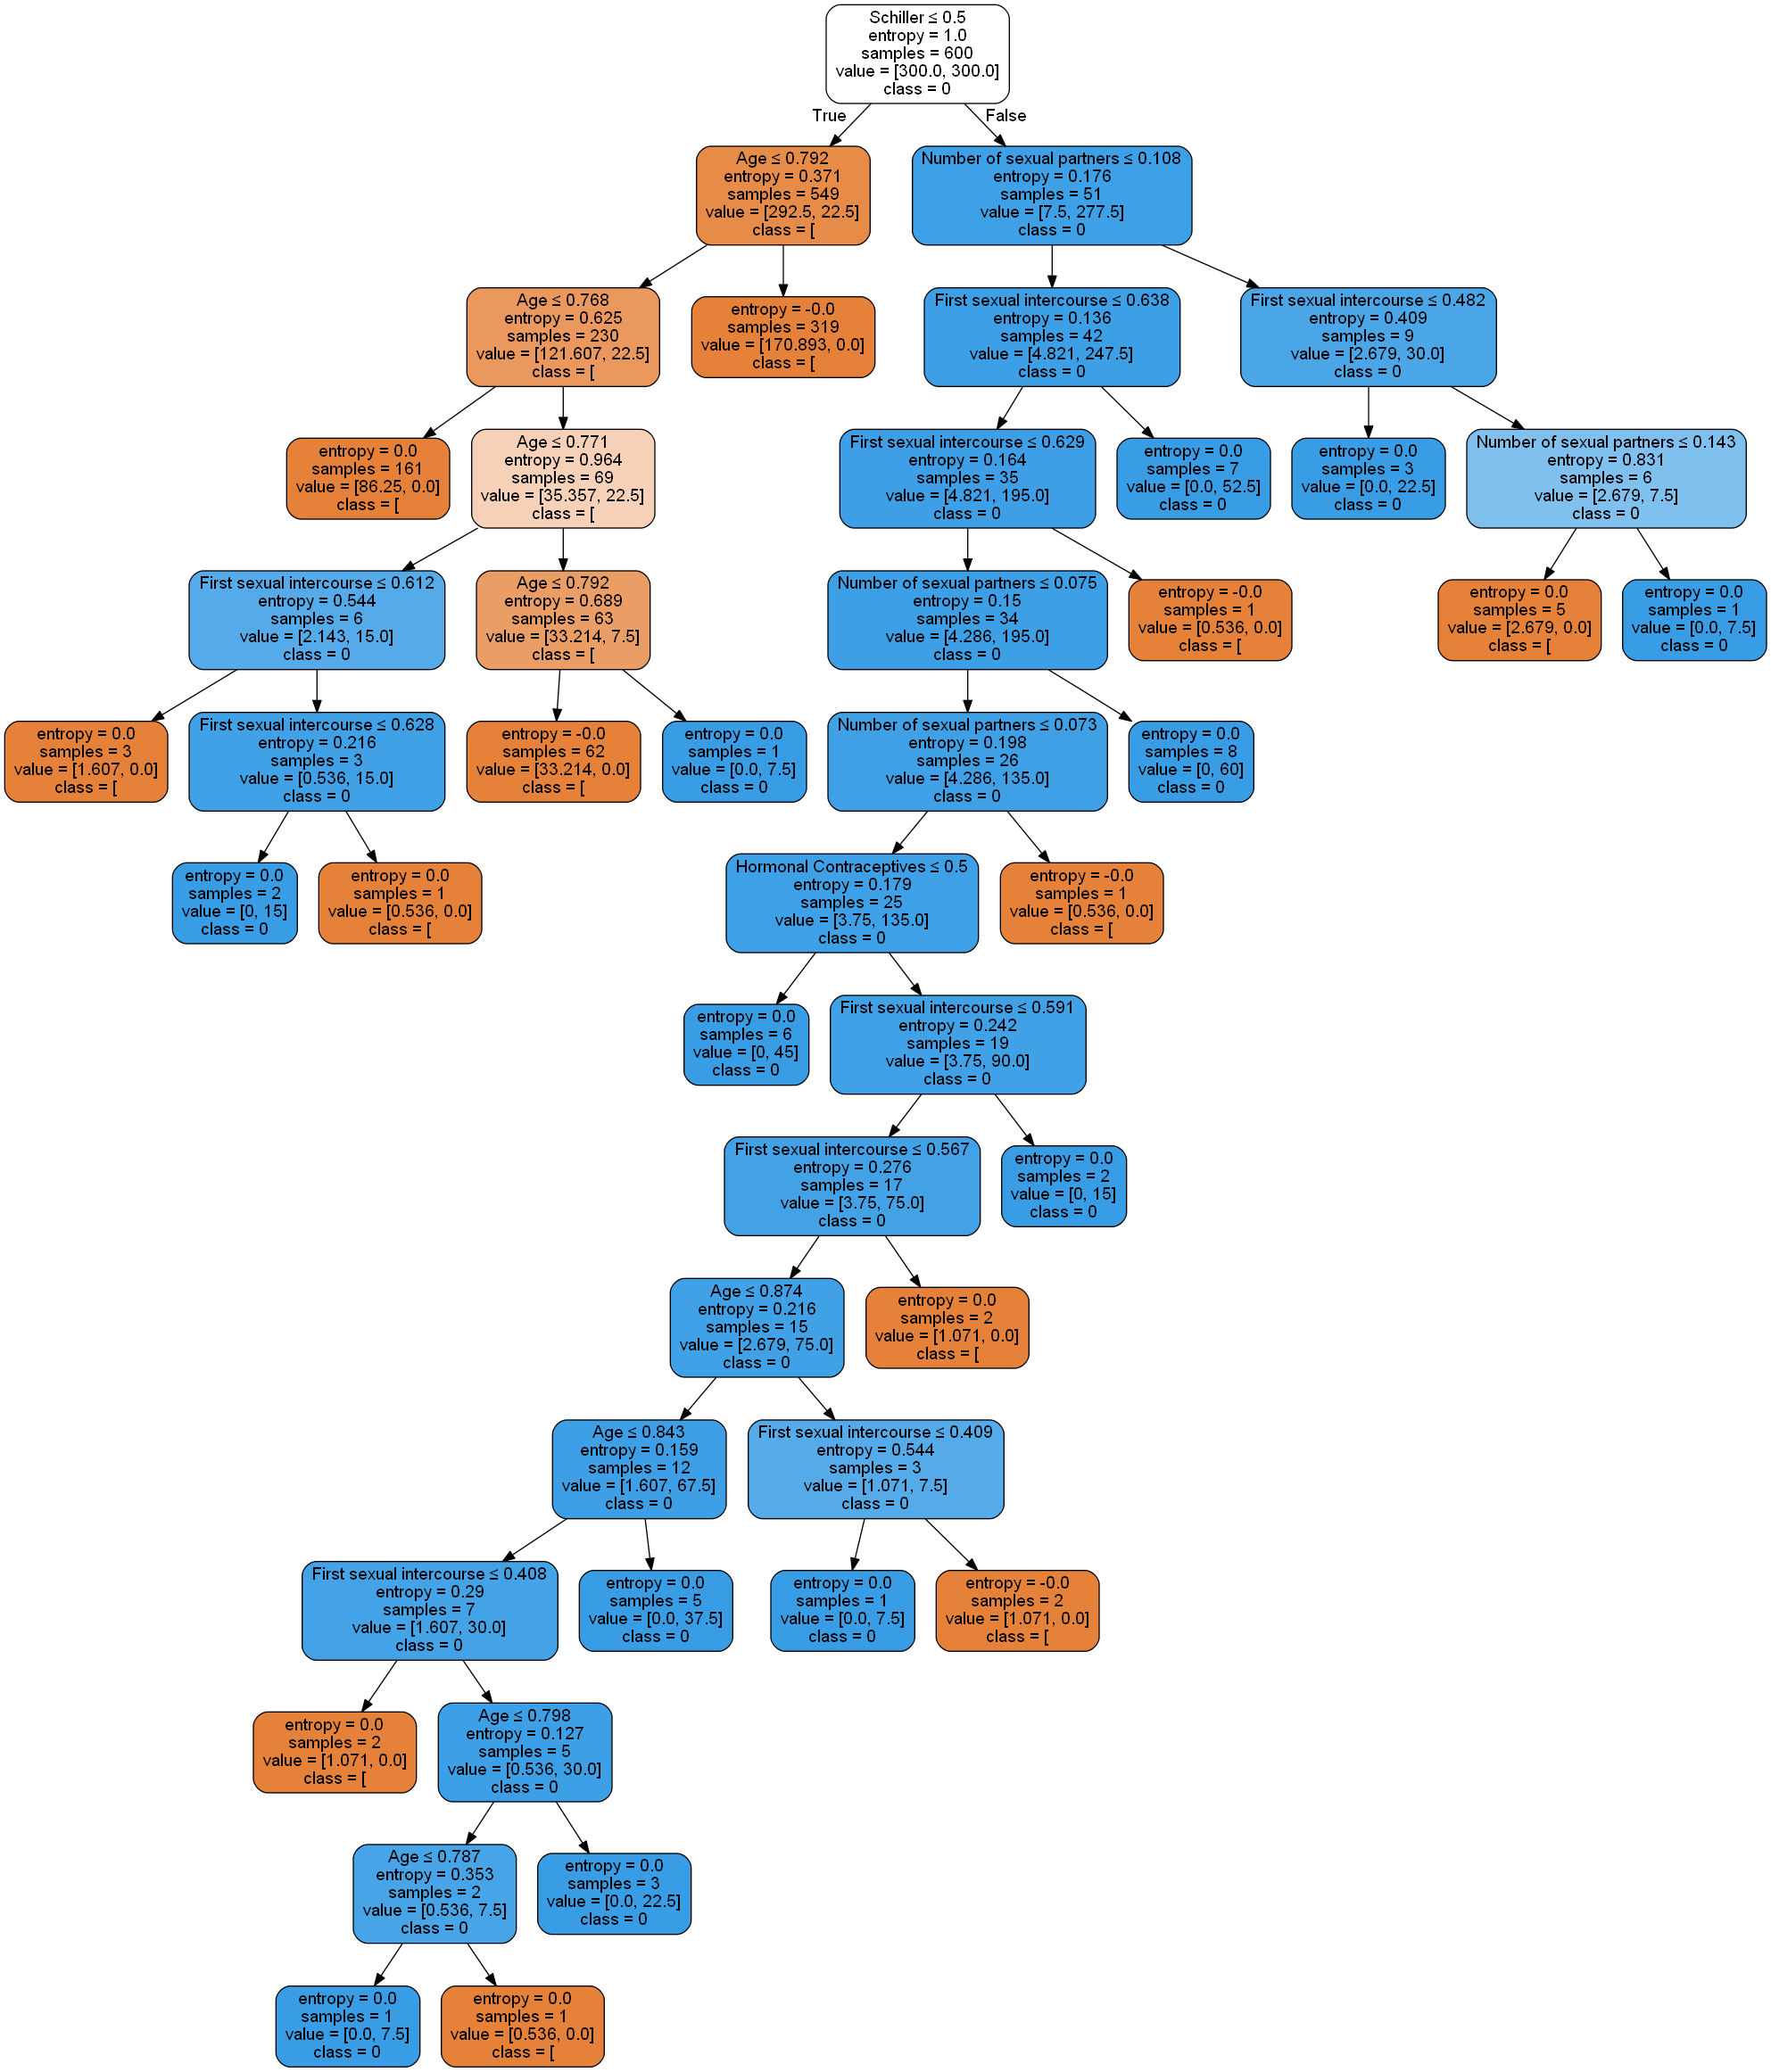

In [86]:
feature_col = X_train.columns
class_col = pd.unique(y_train)
class_col = np.array(class_col)
class_col = str(class_col).replace(" ", "")

dot_data = StringIO()
export_graphviz(model_Tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=feature_col,
               class_names=class_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [87]:
pd.DataFrame(model_Tree.feature_importances_, index = X_train.columns, 
             columns=["Importance"]).sort_values(by="Importance", ascending=False)

,Importance
Schiller,0.721710
Age,0.190826
First sexual intercourse,0.057708
Number of sexual partners,0.026162
Hormonal Contraceptives,0.003595
Hinselmann,0.000000
Citology,0.000000
Dx:HPV,0.000000


El modelo del Árbol de decisión solo usó cinco predictores, pero aún así obtuvo una alta precisión y recuperación.

Todos los predictores para este modelo son los mismos que los principales predictores del modelo de regresión logística, excepto algunas características. 

***

### Árboles de decisión con profundidad

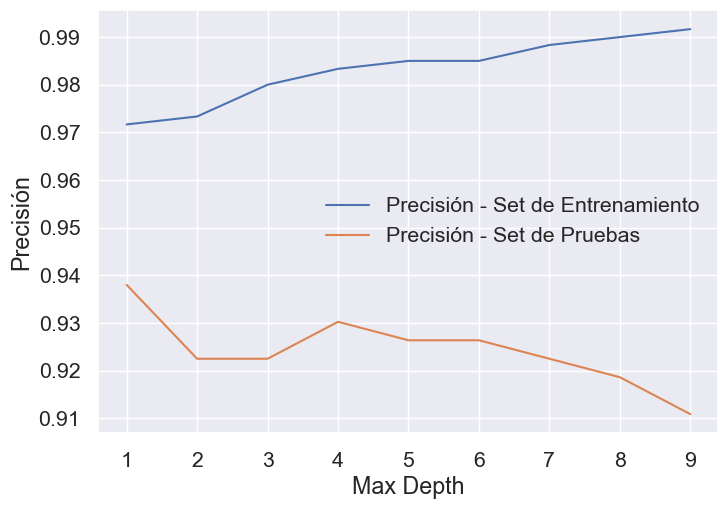

In [88]:
from sklearn.tree import DecisionTreeClassifier

training_acc = []
test_acc = []

depth = range(1, 10)
for d in depth:
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    training_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))
            
plt.plot(depth, training_acc, label=u"Precisión - Set de Entrenamiento")
plt.plot(depth, test_acc, label=u"Precisión - Set de Pruebas")
plt.ylabel(u"Precisión")
plt.xlabel(u"Max Depth")
plt.legend()

In [89]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

print("Valores finales para max_depth=3")
print("Precisión - Set de Entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión - Set de Pruebas: {:.3f}".format(tree.score(X_test, y_test)))

Valores finales para max_depth=3
Precisión - Set de Entrenamiento: 0.980
Precisión - Set de Pruebas: 0.922


Ya seleccionamos 1 parámetro para estabilizar el modelo y de acuerdo al gráfico anterior, se ve estable. Ahora necesitamos seleccionar una segunda variable, para validar el comportamiento que nuestro modelo tiene

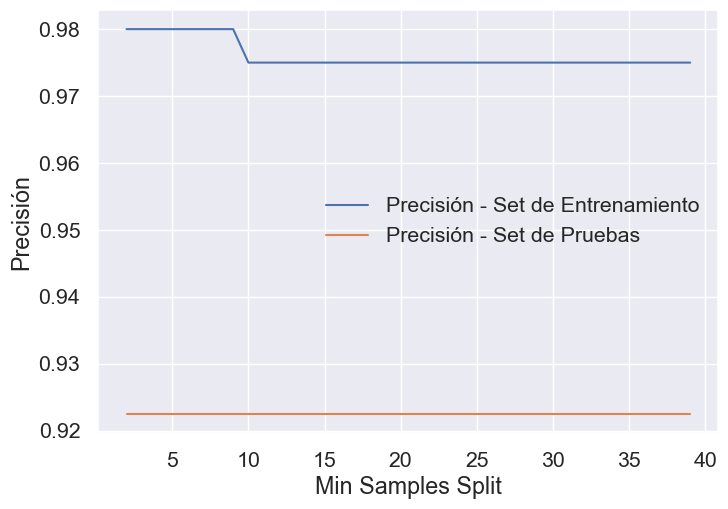

In [90]:
from sklearn.tree import DecisionTreeClassifier

training_acc = []
test_acc = []

min_samples = range(2, 40)
for m in min_samples:
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=m)
    tree.fit(X_train, y_train)
    training_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))
            
plt.plot(min_samples, training_acc, label=u"Precisión - Set de Entrenamiento")
plt.plot(min_samples, test_acc, label=u"Precisión - Set de Pruebas")
plt.ylabel(u"Precisión")
plt.xlabel(u"Min Samples Split")
plt.legend()

In [91]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=22)
tree.fit(X_train, y_train)

print("Valores finales para min_samples_split=22")
print("Precisión - Set de Entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión - Set de Pruebas: {:.3f}".format(tree.score(X_test, y_test)))

Valores finales para min_samples_split=22
Precisión - Set de Entrenamiento: 0.975
Precisión - Set de Pruebas: 0.922


***